# **Exploratory Data Analysis - Feature Set 2**

The dynamic features from feature set 2 represent features that are Popular in Literature, available in MIMIC but clinically not common (with WAVE used as a proxy).

We will carry out EDA on purely the features in the second feature set in a similar manner to that completed for feature set 1.

We we need to see how much data is missing, how many patients we have and what features have been recorded.

This will inform the preprocessing steps required.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load patient data for feature set 2
file_path = '/content/drive/MyDrive/MSc_Final_Project/02_data_analysis/mimic/data_analysis/datasets/05_time_series_data_extraction/feature_set_2_results/full_data_set_2.parquet'

patient_data_f2_df = pd.read_parquet(file_path)
patient_data_f2_df.head()

,subject_id,charttime,itemid,valuenum
0,10001884,2131-01-12 15:00:00,223835.0,40.0
1,10001884,2131-01-12 15:00:00,224685.0,284.0
2,10001884,2131-01-12 15:00:00,224686.0,284.0
3,10001884,2131-01-12 15:00:00,224687.0,6.1
4,10001884,2131-01-12 15:00:00,224695.0,17.0


In [4]:
patient_data_f2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248413 entries, 0 to 248412
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  248413 non-null  int64         
 1   charttime   248413 non-null  datetime64[ns]
 2   itemid      248413 non-null  float64       
 3   valuenum    247614 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 7.6 MB


In [5]:
# Convert itemid to int
patient_data_f2_df['itemid'] = patient_data_f2_df['itemid'].astype('int64')
patient_data_f2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248413 entries, 0 to 248412
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  248413 non-null  int64         
 1   charttime   248413 non-null  datetime64[ns]
 2   itemid      248413 non-null  int64         
 3   valuenum    247614 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 7.6 MB


In [6]:
# Load labels for patient
label_path = '/content/drive/MyDrive/MSc_Final_Project/02_data_analysis/mimic/data_analysis/datasets/05_time_series_data_extraction/feature_set_2_results/full_labels_2.parquet'
label_df = pd.read_parquet(label_path)
label_df.head()

,subject_id,extubation_failure
0,10001884,1
1,10001884,1
2,10001884,1
3,10001884,1
4,10001884,1


**Number of patients**

This should be the same as in the first patient feature set - 4701


In [7]:
# Count the number of unique subject_ids
patient_data_f2_df['subject_id'].nunique()

4701

**Extubation failure proportion**

Should be equivalent to feature set 1 = 32.84%

In [8]:
# For each unique patient in the labels file give the proportion that have extubation_failure = 1 and = 0
labels_unique = label_df.drop_duplicates(subset=['subject_id'])
total_patients = len(labels_unique)
extubation_failure_count = labels_unique['extubation_failure'].sum()
failure_percentage = (extubation_failure_count / total_patients) * 100
print(f'Extubation failure proportion: {failure_percentage:.2f}%')

Extubation failure proportion: 32.84%


# **Feature analysis**

We wil now look at the features extracted in relation to feature set 2.

**01 - Feature identification**

Confirm the features we have in the data.

In [9]:
# Load the d_items data frame
d_items_file = '/content/drive/MyDrive/MSc_Final_Project/02_data_analysis/mimic/mimic-iv-2.2-raw-data/icu/d_items.csv'
d_items_df = pd.read_csv(d_items_file)
d_items_df.head()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,220001,Problem List,Problem List,chartevents,General,NaN,Text,NaN,NaN
1,220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,NaN,Date and time,NaN,NaN
2,220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,NaN,NaN
3,220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,NaN,NaN
4,220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,NaN,NaN


In [10]:
# Print out the corresponding label for the unique itemids in the patient data
for itemid in patient_data_f2_df['itemid'].unique():
    label = d_items_df[d_items_df['itemid'] == itemid]['label'].values[0]
    print(f"{itemid}: {label}")

223835: Inspired O2 Fraction
224685: Tidal Volume (observed)
224686: Tidal Volume (spontaneous)
224687: Minute Volume
224695: Peak Insp. Pressure
224697: Mean Airway Pressure
228640: EtCO2
220045: Heart Rate
220210: Respiratory Rate
220739: GCS - Eye Opening
223901: GCS - Motor Response
220277: O2 saturation pulseoxymetry
228096: Richmond-RAS Scale
223849: Ventilator Mode
220050: Arterial Blood Pressure systolic
220051: Arterial Blood Pressure diastolic
220052: Arterial Blood Pressure mean
223761: Temperature Fahrenheit
220545: Hematocrit (serum)
220645: Sodium (serum)
227442: Potassium (serum)
220224: Arterial O2 pressure
220235: Arterial CO2 Pressure
223830: PH (Arterial)
225667: Ionized Calcium
225668: Lactic Acid
220228: Hemoglobin
220546: WBC
220615: Creatinine (serum)
220621: Glucose (serum)
227457: Platelet Count
224696: Plateau Pressure
225690: Total Bilirubin
224419: Negative Insp. Force


In [11]:
len(patient_data_f2_df['itemid'].unique())

34

The data contains all patient data from Feature set 1 and 2.

This is useful as we want to incrementally train our LSTM model. First we see what its performance is like with a smaller feature set that is popular and available and then we include features that are popular and less available and see how feature importance differs.

**02 - Data reformatting**

First the charttime column needs to be reformatted to represent the hours to extubation, rather than the raw datetime.

Currently each patient will have data recorded at different times and dates and this will not be comparable.

We can create a new column of 'time_to_extubation' based on the extubation_starttime for each patient to create a consistent temporal format across all patients.

In [12]:
# Load the full patient list with extubation_starttimes
all_patients = '/content/drive/MyDrive/MSc_Final_Project/02_data_analysis/mimic/data_analysis/datasets/03_annotated_set/annotation_v03.parquet'
all_patients_df = pd.read_parquet(all_patients)
all_patients_df.head()

,subject_id,hadm_id,stay_id,ventilation_starttime,ventilation_endtime,ventilation_itemid,ventilation_ordercategoryname,extubation_starttime,extubation_endtime,extubation_itemid,extubation_ordercategoryname,ventilation_duration,anchor_age,extubation_failure
0,10001884,26184834,37510196,2131-01-11 04:40:00,2131-01-12 17:40:00,225792,Ventilation,2131-01-12 17:40:00,2131-01-12 17:41:00,227194,Intubation/Extubation,2220.0,68,1
22,10002428,28662225,38875437,2156-04-19 20:10:00,2156-04-22 17:05:00,225792,Ventilation,2156-04-22 17:10:00,2156-04-22 17:11:00,227194,Intubation/Extubation,4135.0,80,0
29,10004235,24181354,34100191,2196-02-24 16:52:00,2196-02-27 16:28:00,225792,Ventilation,2196-02-27 16:28:00,2196-02-27 16:29:00,227194,Intubation/Extubation,4296.0,47,1
32,10004720,22081550,35009126,2186-11-12 20:29:00,2186-11-17 14:00:00,225792,Ventilation,2186-11-17 14:00:00,2186-11-17 14:01:00,227194,Intubation/Extubation,6811.0,61,1
33,10004733,27411876,39635619,2174-12-04 12:25:00,2174-12-07 16:20:00,225792,Ventilation,2174-12-07 16:20:00,2174-12-07 16:21:00,227194,Intubation/Extubation,4555.0,51,0


In [13]:
# Extract only subject_id and extubation_starttime
all_patients_df = all_patients_df[['subject_id', 'extubation_starttime']]
all_patients_df.head()

,subject_id,extubation_starttime
0,10001884,2131-01-12 17:40:00
22,10002428,2156-04-22 17:10:00
29,10004235,2196-02-27 16:28:00
32,10004720,2186-11-17 14:00:00
33,10004733,2174-12-07 16:20:00


In [14]:
# Create a new column in the extracted patient set of time_to_extubation and calculate based on extubation_starttime in all_patients, matched to subejct_id
patient_data_f2_merged_df = pd.merge(patient_data_f2_df, all_patients_df, on='subject_id', how='left')
patient_data_f2_merged_df['time_to_extubation_mins'] = (patient_data_f2_merged_df['extubation_starttime'] - patient_data_f2_merged_df['charttime']) / np.timedelta64(1, 'm')
patient_data_f2_merged_df.head()

,subject_id,charttime,itemid,valuenum,extubation_starttime,time_to_extubation_mins
0,10001884,2131-01-12 15:00:00,223835,40.0,2131-01-12 17:40:00,160.0
1,10001884,2131-01-12 15:00:00,224685,284.0,2131-01-12 17:40:00,160.0
2,10001884,2131-01-12 15:00:00,224686,284.0,2131-01-12 17:40:00,160.0
3,10001884,2131-01-12 15:00:00,224687,6.1,2131-01-12 17:40:00,160.0
4,10001884,2131-01-12 15:00:00,224695,17.0,2131-01-12 17:40:00,160.0


In [15]:
# Create an additional column for ascending chronological order of charttime within the 6 hour window called 'time_from_window_start'
patient_data_f2_merged_df['time_from_window_start_mins'] = (6 * 60) - patient_data_f2_merged_df['time_to_extubation_mins']
patient_data_f2_merged_df.head()

,subject_id,charttime,itemid,valuenum,extubation_starttime,time_to_extubation_mins,time_from_window_start_mins
0,10001884,2131-01-12 15:00:00,223835,40.0,2131-01-12 17:40:00,160.0,200.0
1,10001884,2131-01-12 15:00:00,224685,284.0,2131-01-12 17:40:00,160.0,200.0
2,10001884,2131-01-12 15:00:00,224686,284.0,2131-01-12 17:40:00,160.0,200.0
3,10001884,2131-01-12 15:00:00,224687,6.1,2131-01-12 17:40:00,160.0,200.0
4,10001884,2131-01-12 15:00:00,224695,17.0,2131-01-12 17:40:00,160.0,200.0


In [16]:
# Drop charttime, extubation_starttime and time_to_extubation_mins
patient_data_f2_merged_df = patient_data_f2_merged_df.drop(['charttime', 'extubation_starttime', 'time_to_extubation_mins'], axis=1)
patient_data_f2_merged_df.head()

,subject_id,itemid,valuenum,time_from_window_start_mins
0,10001884,223835,40.0,200.0
1,10001884,224685,284.0,200.0
2,10001884,224686,284.0,200.0
3,10001884,224687,6.1,200.0
4,10001884,224695,17.0,200.0


In [17]:
patient_data_f2_reformatted_df = patient_data_f2_merged_df.copy()
patient_data_f2_reformatted_df.head()

,subject_id,itemid,valuenum,time_from_window_start_mins
0,10001884,223835,40.0,200.0
1,10001884,224685,284.0,200.0
2,10001884,224686,284.0,200.0
3,10001884,224687,6.1,200.0
4,10001884,224695,17.0,200.0


In [ ]:
# Save for now
patient_data_f2_reformatted_df.to_parquet

**03 - Missing Data Analysis**

We need to look at what data is missing for each feature.

We should do this analysis only for the data in feature set 2 alone as we have already done this for feature set 1.

In [20]:
# State the features to be extracted
feature_set_1_and_2_dynamic = [220210, 220277, 228640, 220235, 223830, 220224, 220228, 223835, 224685, 224686, 224695, 224687,
                         224696, 223849, 224419, 220045, 223901, 220739, 220052, 223761, 228096, 220050, 220051, 220546,
                         220615, 227457, 220645, 227442, 225668, 220621, 225690, 220545, 225667, 224697]
len(feature_set_1_and_2_dynamic)

34

In [21]:
# State the features to be extracted
feature_set_1_dynamic = [220210, 220277, 228640, 220235, 223830, 220224,
                         220228, 223835, 224685, 224686, 224695, 224687, 224696, 223849, 224419]

len(feature_set_1_dynamic)

15

In [22]:
feature_set_2_dynamic = set(feature_set_1_and_2_dynamic) - set(feature_set_1_dynamic)
len(feature_set_2_dynamic)

19

In [23]:
# Extract all patient data relating only to itemids in feature set 2
patient_data_f2_dynamic_df = patient_data_f2_reformatted_df[patient_data_f2_reformatted_df['itemid'].isin(feature_set_2_dynamic)]
patient_data_f2_dynamic_df.head()

,subject_id,itemid,valuenum,time_from_window_start_mins
5,10001884,224697,7.6,200.0
7,10001884,220045,51.0,20.0
9,10001884,220739,3.0,20.0
10,10001884,223901,6.0,20.0
12,10001884,220045,60.0,24.0


In [24]:
# For each itemid count the number of null values
null_counts = patient_data_f2_dynamic_df.groupby('itemid')['valuenum'].apply(lambda x: x.isnull().sum()).reset_index(name='null_count')
null_counts.columns = ['itemid', 'null_count']
null_counts

,itemid,null_count
0,220045,0
1,220050,0
2,220051,0
3,220052,0
4,220545,0
5,220546,0
6,220615,0
7,220621,0
8,220645,0
9,220739,0


There are no null values within the measurements that have been recorded for feature set 2.

**04 - Sampling frequency within the 6 hour time window**

For each feature we can count the number of observations in the 6 hour time window.

In [27]:
sampling_frequency = patient_data_f2_dynamic_df.groupby(['itemid', 'time_from_window_start_mins']).size().reset_index()
sampling_frequency.columns = ['itemid', 'time_from_window_start_mins', 'count']
sampling_frequency.head()

,itemid,time_from_window_start_mins,count
0,220045,0.0,466
1,220045,1.0,51
2,220045,2.0,69
3,220045,3.0,42
4,220045,4.0,47


Adding the labels to the features for clarity.

In [30]:
patient_data_f2_dynamic_df = pd.merge(patient_data_f2_dynamic_df, d_items_df[['itemid', 'label']], on='itemid', how='left')

patient_data_f2_dynamic_df.head()

,subject_id,itemid,valuenum,time_from_window_start_mins,label_x,label_y,label
0,10001884,224697,7.6,200.0,Mean Airway Pressure,Mean Airway Pressure,Mean Airway Pressure
1,10001884,220045,51.0,20.0,Heart Rate,Heart Rate,Heart Rate
2,10001884,220739,3.0,20.0,GCS - Eye Opening,GCS - Eye Opening,GCS - Eye Opening
3,10001884,223901,6.0,20.0,GCS - Motor Response,GCS - Motor Response,GCS - Motor Response
4,10001884,220045,60.0,24.0,Heart Rate,Heart Rate,Heart Rate


In [31]:
# Drop label_x and label_y
patient_data_f2_dynamic_df = patient_data_f2_dynamic_df.drop(['label_x', 'label_y'], axis=1)
patient_data_f2_dynamic_df.head()

,subject_id,itemid,valuenum,time_from_window_start_mins,label
0,10001884,224697,7.6,200.0,Mean Airway Pressure
1,10001884,220045,51.0,20.0,Heart Rate
2,10001884,220739,3.0,20.0,GCS - Eye Opening
3,10001884,223901,6.0,20.0,GCS - Motor Response
4,10001884,220045,60.0,24.0,Heart Rate


In [33]:
# Get the unique labels
labels = patient_data_f2_dynamic_df['label'].unique()
labels

array(['Mean Airway Pressure', 'Heart Rate', 'GCS - Eye Opening',
       'GCS - Motor Response', 'Richmond-RAS Scale',
       'Arterial Blood Pressure systolic',
       'Arterial Blood Pressure diastolic',
       'Arterial Blood Pressure mean', 'Temperature Fahrenheit',
       'Hematocrit (serum)', 'Sodium (serum)', 'Potassium (serum)',
       'Ionized Calcium', 'Lactic Acid', 'WBC', 'Creatinine (serum)',
       'Glucose (serum)', 'Platelet Count', 'Total Bilirubin'],
      dtype=object)

In [34]:
# Calculate the total number of observations per label
total_observations = patient_data_f2_dynamic_df['label'].value_counts().reset_index()
total_observations.columns = ['label', 'total_count']
# Display the total observations
total_observations

,label,total_count
0,Heart Rate,31250
1,Arterial Blood Pressure mean,17681
2,Arterial Blood Pressure diastolic,17649
3,Arterial Blood Pressure systolic,17646
4,GCS - Eye Opening,7677
5,GCS - Motor Response,7655
6,Mean Airway Pressure,7371
7,Temperature Fahrenheit,6798
8,Richmond-RAS Scale,6012
9,Sodium (serum),1445


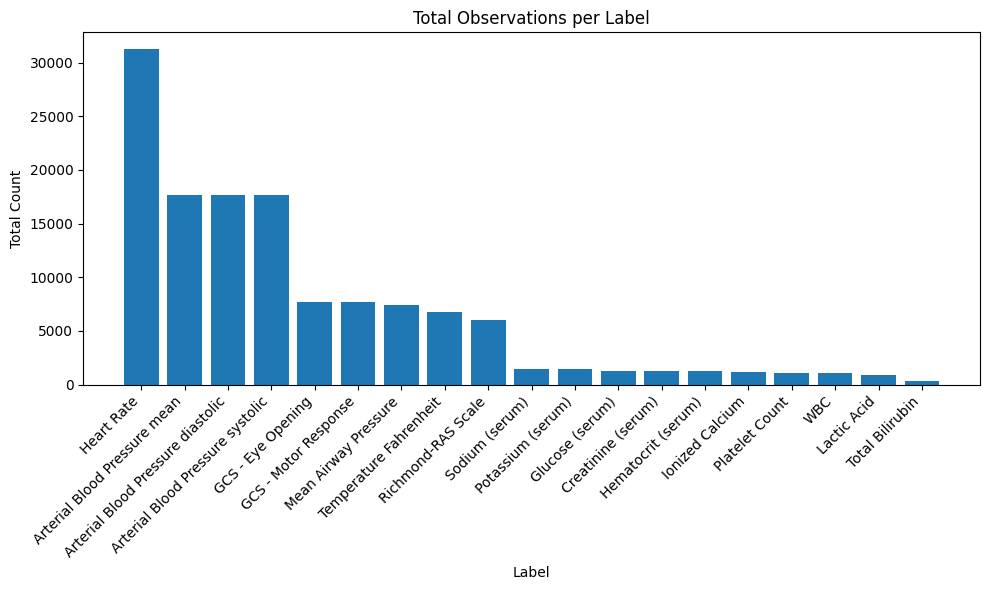

In [35]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(total_observations['label'], total_observations['total_count'])
plt.xlabel('Label')
plt.ylabel('Total Count')
plt.title('Total Observations per Label')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Heart Rate is the most observed as expected.

Quite a few lab results (WBC, Lactic Acid and Total Bilirubin) are at the other end of the spectrum.

**05 - Sampling frequency per patient**

In [36]:
# Group by subject_id and itemid to count the number of samples for each combination
per_patient_sampling_frequency = patient_data_f2_dynamic_df.groupby(['subject_id', 'label']).size().reset_index(name='count')
per_patient_sampling_frequency.head()

,subject_id,label,count
0,10001884,GCS - Eye Opening,2
1,10001884,GCS - Motor Response,2
2,10001884,Heart Rate,12
3,10001884,Mean Airway Pressure,1
4,10001884,Richmond-RAS Scale,1


In [37]:
# Using dataframe per_patient_sampling_frequency: pivot to have subject id as rows
per_patient_sampling_frequency_pivot = per_patient_sampling_frequency.pivot(index='subject_id', columns='label', values='count').fillna(0)
per_patient_sampling_frequency_pivot

label,Arterial Blood Pressure diastolic,Arterial Blood Pressure mean,Arterial Blood Pressure systolic,Creatinine (serum),GCS - Eye Opening,GCS - Motor Response,Glucose (serum),Heart Rate,Hematocrit (serum),Ionized Calcium,Lactic Acid,Mean Airway Pressure,Platelet Count,Potassium (serum),Richmond-RAS Scale,Sodium (serum),Temperature Fahrenheit,Total Bilirubin,WBC
subject_id,,,,,,,,,,,,,,,,,,,
10001884,0.0,0.0,0.0,0.0,2.0,2.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10002428,6.0,6.0,6.0,0.0,2.0,2.0,0.0,6.0,1.0,0.0,0.0,2.0,0.0,1.0,3.0,1.0,3.0,0.0,0.0
10004235,0.0,0.0,0.0,1.0,1.0,1.0,1.0,6.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
10004720,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10004733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17912822,7.0,7.0,7.0,0.0,3.0,3.0,0.0,7.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
17914007,6.0,6.0,6.0,1.0,1.0,1.0,1.0,6.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0
17920350,0.0,0.0,0.0,1.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [38]:
# Calculate the average sampling frequency per feature
average_sampling_frequency = per_patient_sampling_frequency_pivot.mean().sort_values(ascending=False)

# Create columns for the table
average_sampling_frequency_df = pd.DataFrame({'Feature': average_sampling_frequency.index, 'Average Sampling Frequency': average_sampling_frequency.values})

# Display the table
average_sampling_frequency_df

,Feature,Average Sampling Frequency
0,Heart Rate,6.648936
1,Arterial Blood Pressure mean,3.761915
2,Arterial Blood Pressure diastolic,3.755106
3,Arterial Blood Pressure systolic,3.754468
4,GCS - Eye Opening,1.633404
5,GCS - Motor Response,1.628723
6,Mean Airway Pressure,1.568298
7,Temperature Fahrenheit,1.446383
8,Richmond-RAS Scale,1.279149
9,Sodium (serum),0.307447


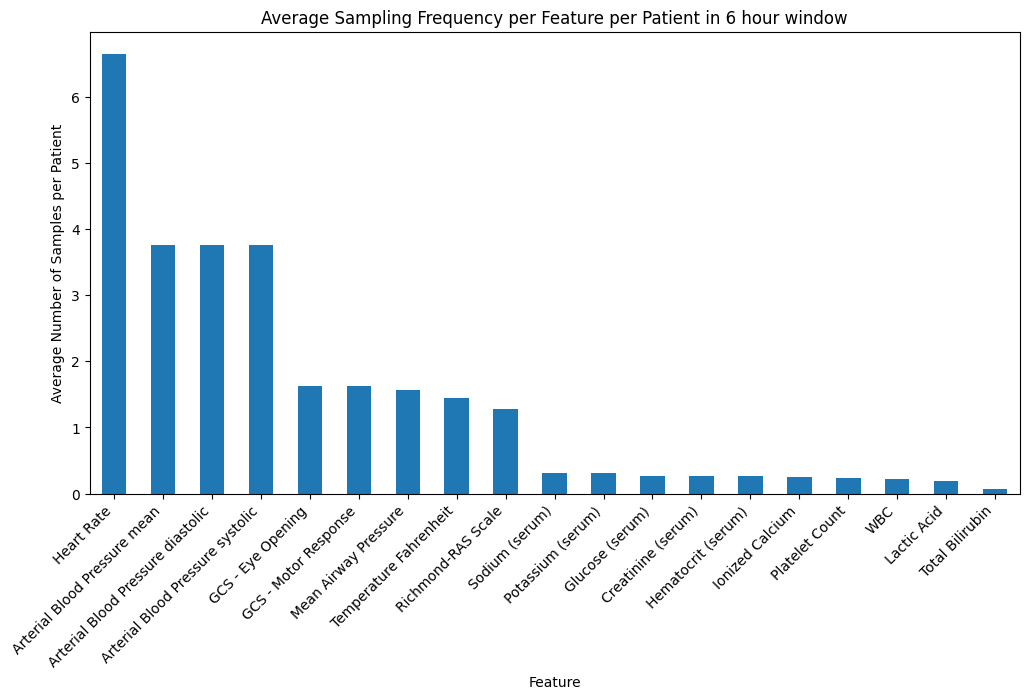

In [39]:
# Plot the average sampling frequency
plt.figure(figsize=(12, 6))
average_sampling_frequency.plot(kind='bar')
plt.title('Average Sampling Frequency per Feature per Patient in 6 hour window')
plt.xlabel('Feature')
plt.ylabel('Average Number of Samples per Patient')
plt.xticks(rotation=45, ha='right')
plt.show()

Total Bilirubin is observed less than 0.1 times in the 6 hour window hence it will be removed in later pre-processing as per the reference paper.

**06 - Temporal Sampling Frequency**



In [42]:
temporal_sampling = patient_data_f2_dynamic_df.sort_values(by=['subject_id', 'label', 'time_from_window_start_mins'])
temporal_sampling['time_diff'] = temporal_sampling.groupby(['subject_id', 'label'])['time_from_window_start_mins'].diff()
temporal_sampling = temporal_sampling.dropna(subset=['time_diff'])

In [43]:
# Calculate the average time difference
average_time_diff = temporal_sampling.groupby('label')['time_diff'].mean().sort_values(ascending=False)
average_time_diff

label
Sodium (serum)                       215.134615
Potassium (serum)                    214.472727
Glucose (serum)                      208.631579
Creatinine (serum)                   192.178571
WBC                                  189.264706
Hematocrit (serum)                   186.267857
Platelet Count                       185.021739
Temperature Fahrenheit               181.338399
Ionized Calcium                      181.206250
Richmond-RAS Scale                   170.770611
GCS - Eye Opening                    156.665451
GCS - Motor Response                 156.545814
Mean Airway Pressure                 154.275373
Lactic Acid                          148.729730
Total Bilirubin                      130.750000
Heart Rate                            54.071827
Arterial Blood Pressure systolic      53.413434
Arterial Blood Pressure mean          53.410593
Arterial Blood Pressure diastolic     53.402737
Name: time_diff, dtype: float64

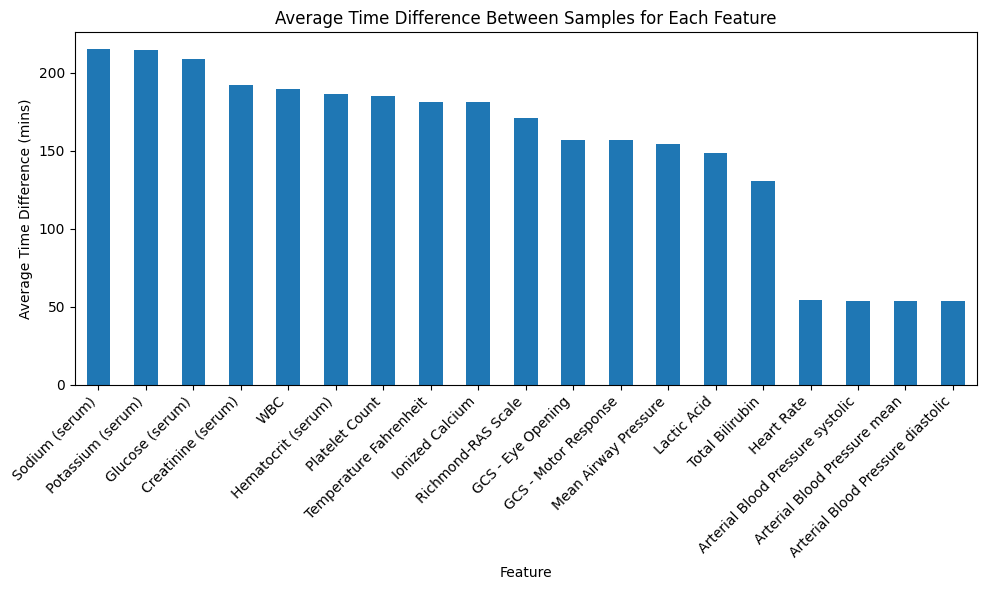

In [44]:
# Plot the average time difference between samples for each feature
plt.figure(figsize=(10, 6))
average_time_diff.plot(kind='bar')
plt.title('Average Time Difference Between Samples for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Average Time Difference (mins)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A larger time difference corresponds to fewer samples taken. As such, the features with larger time differences will require significant resampling to convert to consistent sampling frequencies.

In [45]:
# Add labels to pateint data
patient_data_f2_labels_df = pd.merge(patient_data_f2_reformatted_df, d_items_df[['itemid', 'label']], on='itemid', how='left')
patient_data_f2_labels_df.head()

,subject_id,itemid,valuenum,time_from_window_start_mins,label
0,10001884,223835,40.0,200.0,Inspired O2 Fraction
1,10001884,224685,284.0,200.0,Tidal Volume (observed)
2,10001884,224686,284.0,200.0,Tidal Volume (spontaneous)
3,10001884,224687,6.1,200.0,Minute Volume
4,10001884,224695,17.0,200.0,Peak Insp. Pressure


In [50]:
# Count the number of unique itemids
patient_data_f2_labels_df['itemid'].nunique()

34

In [51]:
# Rename label to feature_label
patient_data_f2_labels_df = patient_data_f2_labels_df.rename(columns={'label': 'feature_label'})
patient_data_f2_labels_df.head()

,subject_id,itemid,valuenum,time_from_window_start_mins,feature_label
0,10001884,223835,40.0,200.0,Inspired O2 Fraction
1,10001884,224685,284.0,200.0,Tidal Volume (observed)
2,10001884,224686,284.0,200.0,Tidal Volume (spontaneous)
3,10001884,224687,6.1,200.0,Minute Volume
4,10001884,224695,17.0,200.0,Peak Insp. Pressure


In [52]:
# Save full dataset with feature labels for later use
patient_data_f2_labels_df.to_parquet('/content/drive/MyDrive/MSc_Final_Project/02_data_analysis/mimic/data_analysis/datasets/06_extracted_data_analysis/02_feature_set_2_analysis/patient_f2_dynamic_data.parquet')